<a href="https://colab.research.google.com/github/Ale2611/Python/blob/main/GraficosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

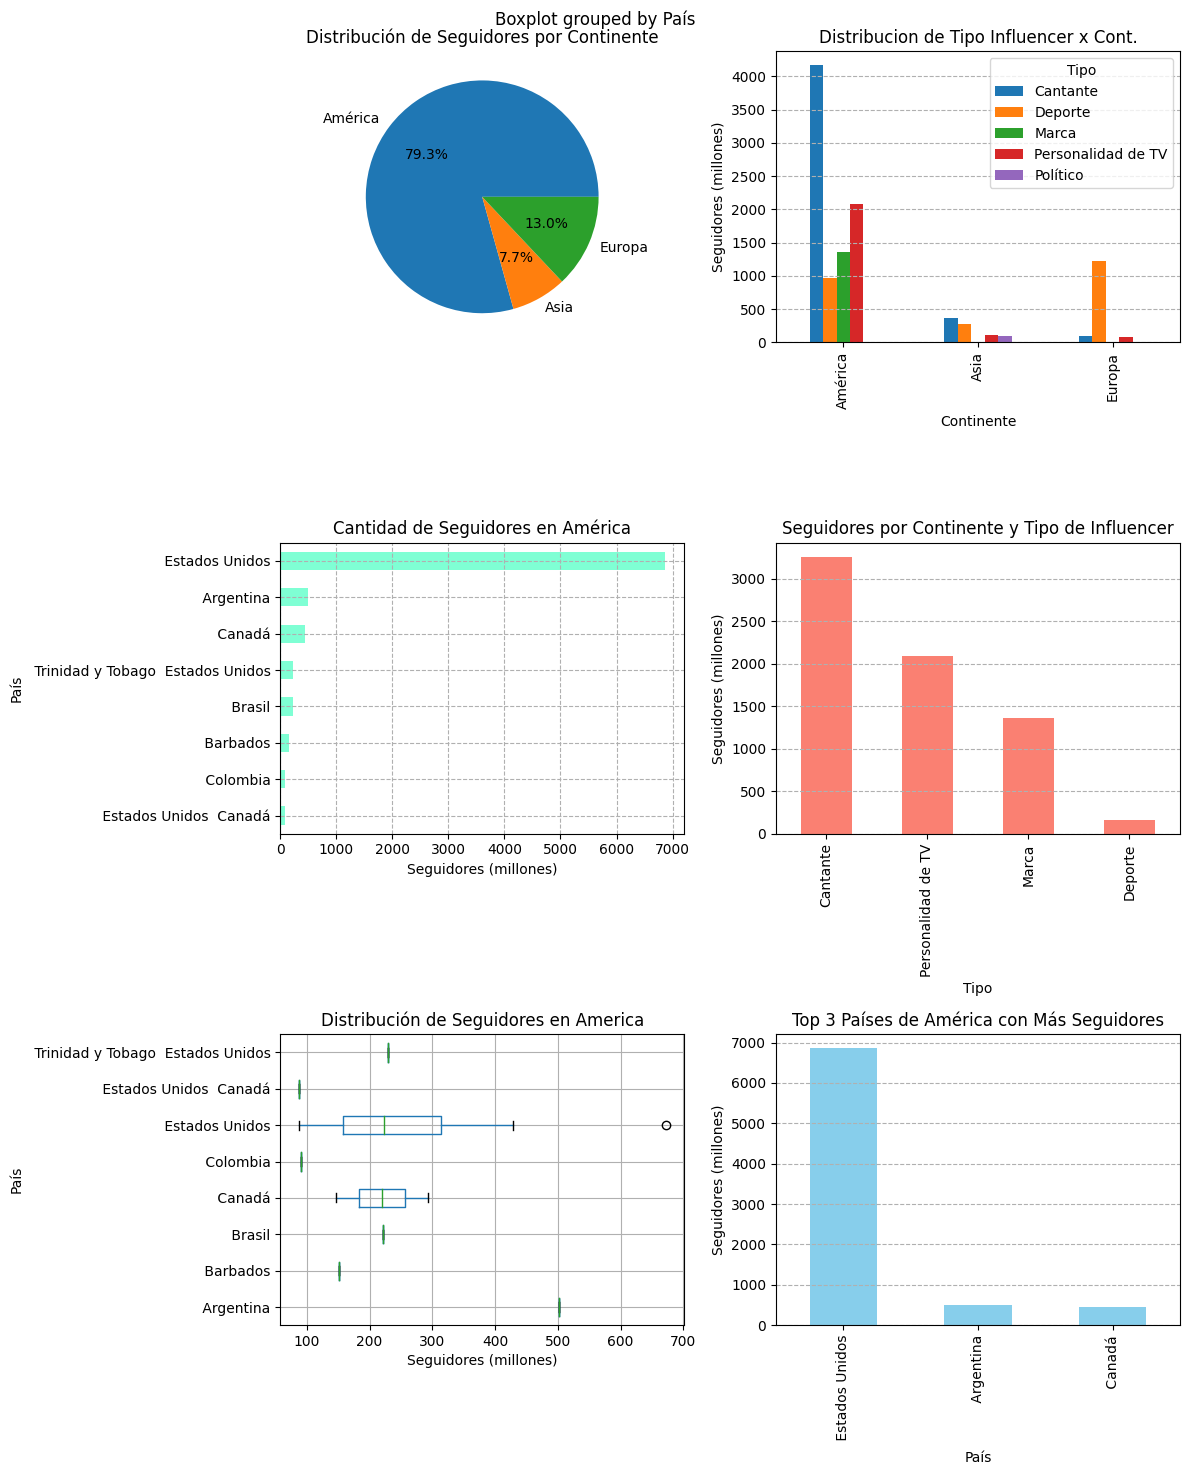

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos del archivo Excel
datos = pd.read_excel("Influencer.xlsx", sheet_name="Hoja1", index_col=0)

# Definir las funciones para clasificar la ocupación y el continente
def clasificar_ocupacion(ocupacion):
    Deportes = ['fut', 'fút', 'balon', 'juga']
    Cantantes = ['canta','rap', 'come']
    Personalidad_TV = ['actr', 'actor', 'tele']
    Marca = ['plat', 'revist','servic', 'agencia', 'empres','club','torneo']
    Politico = ['minist']

    ocupacion_lower = str(ocupacion).lower()
    if any(palabra in ocupacion_lower for palabra in Deportes):
        return 'Deporte'
    elif any(palabra in ocupacion_lower for palabra in Cantantes):
        return 'Cantante'
    elif any(palabra in ocupacion_lower for palabra in Personalidad_TV):
        return 'Personalidad de TV'
    elif any(palabra in ocupacion_lower for palabra in Marca):
        return 'Marca'
    elif any(palabra in ocupacion_lower for palabra in Politico):
        return 'Político'
    else:
        return 'Otro'

def clasificar_continente(pais):
    Europa = ['Portugal','España', 'Europa', 'Francia', 'Reino Unido','Reino Unido  Albania']
    Asia = ['India', 'Israel', 'Tailandia', 'Corea del Sur']
    America=['Estados Unidos', 'Argentina', 'Canadá', 'Trinidad y Tobago  Estados Unidos','Brasil','Barbados','Colombia', 'Estados Unidos  Canadá']

    pais_limpiado = pais.strip()  # Eliminar espacios en blanco al inicio y al final
    if pais_limpiado in Europa:
        return 'Europa'
    elif pais_limpiado in Asia:
        return 'Asia'
    elif pais_limpiado in America:
        return 'América'
    else:
        return 'Otros'

# Aplicar las funciones de clasificación [Agrega columnas en base a las funciones de clasificacion en base a Ocupacion y Pais]
datos['Tipo'] = datos['Ocupación'].astype(str).apply(clasificar_ocupacion)
datos['Continente'] = datos['País'].astype(str).apply(clasificar_continente)


# Crear gráficos
    #Crea una matriz de subgraficos, en este caso 4 graficos, y de 12x10 pulgadas
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# 1 Gráfico de torta de distribución de seguidores por continente
    #Suma la cantidad total de seguidores agrupados por continente, y luego crea un subgrafico de tipo torta (pie), la serie es la suma de
    #seguidores y la etiqueta son los continentes, y el formato de los %)
    #Con set.title se pone el titulo al primer subgrafico.
    #se asocia el grafico del 1er cuadrante.

seguidores_por_continente = datos.groupby('Continente')['Seguidores(millones)'].sum()
axs[0, 0].pie(seguidores_por_continente, labels=seguidores_por_continente.index, autopct='%1.1f%%')
axs[0, 0].set_title('Distribución de Seguidores por Continente')

# 2 # Gráfico de barras de seguidores por tipo de influencer
    #se agrupa seguidores por tipo de influencers, y se suman los seguidores. Se crea un grafico tipo de barras, color salmon, y se
    #lo asocia al 2do cuadrante
seguidores_por_continente_tipo = datos.groupby(['Continente', 'Tipo'])['Seguidores(millones)'].sum().unstack()
seguidores_por_continente_tipo.plot(kind='bar', ax=axs[0, 1])
#axs[0, 1].set_xlabel('Continente')
axs[0, 1].set_ylabel('Seguidores (millones)')
axs[0, 1].set_title('Distribucion de Tipo Influencer x Cont.')
axs[0, 1].legend(title='Tipo')
axs[0, 1].grid(axis='y', linestyle='--')


# 3 Gráfico de barras agrupado de seguidores por continente y tipo de influencer
    #se agrupa continente y tipo, y luego se suman los seguidores por cada combinacion de continente y se usa UNSTACK para desapilar los datos
    #y crear un DataFrame donde tipo queda en las columnas y cada fila representa un continente.
    #se asocia el grafico al 3er cuadrante.

datos["Seguidores(millones)"]= pd.to_numeric(datos["Seguidores(millones)"],errors='coerce') # cambiar float
seguidores_por_continente_Ame = datos.loc[(datos['Continente']=='América')]
seguidores_por_continente_Ame = seguidores_por_continente_Ame.groupby('País')['Seguidores(millones)'].sum()
seguidores_por_continente_Ame = seguidores_por_continente_Ame.sort_values(ascending=True)
#print(seguidores_por_continente_Ame)
seguidores_por_continente_Ame.plot(kind='barh', color='aquamarine', ax=axs[1, 0])
axs[1, 0].set_xlabel('Seguidores (millones)')
axs[1, 0].set_ylabel('País')
axs[1, 0].set_title('Cantidad de Seguidores en América')
axs[1, 0].grid(axis='x', linestyle='--')
axs[1, 0].grid(axis='y', linestyle='--')

# 4 Gráfico de barras horizontales de seguidores por continente
    #Toma seguidores por continente del anterior grafico, crea un grafico de barras horizontales en el segundo subgrafico color
    #aquamarine, asociando este grafico al subgrafico 0,1. Se pone etiquetas de eje x, y y titulo. Solo para probar se agrego lineas --
    #a los ejes x e y.
    #

# seguidores_por_tipo = datos.loc[(datos['Continente']=='América')]
seguidores_por_tipo = datos.loc[(datos['País']==' Estados Unidos')]
seguidores_por_tipo = seguidores_por_tipo.groupby('Tipo')['Seguidores(millones)'].sum()
seguidores_por_tipo = seguidores_por_tipo.sort_values(ascending=False)

#seguidores_por_tipo = datos.groupby('Tipo')['Seguidores(millones)'].sum()
seguidores_por_tipo.plot(kind='bar', color='salmon', ax=axs[1, 1])
#axs[1, 1].set_xlabel('Tipo de Influencer')
axs[1, 1].set_ylabel('Seguidores (millones)')
axs[1, 1].set_title('Seguidores por Continente y Tipo de Influencer')
axs[1, 1].grid(axis='y', linestyle='--')

# Crear gráfico de cajas y bigotes para la distribución de seguidores por continente
seguidores_por_continente_Ame = datos.loc[(datos['Continente']=='América')]
seguidores_por_continente_Ame.boxplot(column='Seguidores(millones)', by='País', vert=False,ax=axs[2, 0])
axs[2, 0].set_xlabel('Seguidores (millones)')
axs[2, 0].set_ylabel('País')
axs[2, 0].set_title('Distribución de Seguidores en America')


# Filtrar los datos para incluir solo los países de América
datos_america = datos[datos['Continente'] == 'América']

# Calcular la cantidad total de seguidores para cada país de América
seguidores_por_pais = datos_america.groupby('País')['Seguidores(millones)'].sum()

# Seleccionar los tres países con más seguidores
top_3_paises = seguidores_por_pais.nlargest(3)

# Crear un gráfico de barras para visualizar los tres países con más seguidores
top_3_paises.plot(kind='bar', color='skyblue', ax=axs[2, 1])
axs[2, 1].set_xlabel('País')
axs[2, 1].set_ylabel('Seguidores (millones)')
axs[2, 1].set_title('Top 3 Países de América con Más Seguidores')
axs[2, 1].grid(axis='y', linestyle='--')

# Ajustar diseño y mostrar gráficos
    #Tight_layout ajusta los graficos a la pantalla para evitar superposiciones, y show, finaliza y muestra los graficos.
plt.tight_layout()
plt.show()
